In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
def efficiency(Ct, Df, name):
    '''Ct: cycle threshhold (пороговый  цикл)
       Df: delution factor (разведения) '''
    log_Df =  np.log10(1 / Df)
    
    # Построение прямой Линейной регрессии: y = ax + b
    lr = LinearRegression().fit(log_Df.reshape(-1, 1), Ct)
    Ct_pred = lr.predict(log_Df.reshape(-1, 1))
    a = lr.coef_[0]
    
    plt.figure(figsize = (12, 10))
    sns.scatterplot(y = Ct, x = log_Df, color = 'salmon', label = 'Experiment')
    sns.lineplot(y = Ct_pred, x = log_Df, color = 'c', label = 'Predicted')
    plt.ylabel("Ct")
    plt.xlabel("log_Df")
    plt.title(name)
    plt.legend();
    plt.savefig(name+"_primers.png")
    
    # E: efficiency, SE: slope
    p = np.sqrt(np.sum(np.power(Ct - Ct_pred, 2)) / (len(Ct) - 1))
    E = pow(10, -1/a)
    SE = pow(a, -2) * np.log(10) * p * E
    
    return round(E, 6), round(SE, 6), round(a, 6), round(p, 6)

### Our results

In [3]:
ACTB = pd.read_csv("ACTB.tsv", sep = '\t')
ACTB.fillna("")

,Row,Gene,Dil.factor,Ct
0,B,ACTB,5,20.2
1,,ACTB,5,20.4
2,,ACTB,5,21.0
3,,ACTB,10,23.2
4,,ACTB,10,23.1
5,,ACTB,10,22.3
6,,ACTB,20,22.8
7,,ACTB,20,22.2
8,,ACTB,20,22.6
9,,ACTB,40,22.8


**1. With all Df.**

Efficiency = 5.686191, Slope = 6.893327
a = -1.324817, p = 0.924066


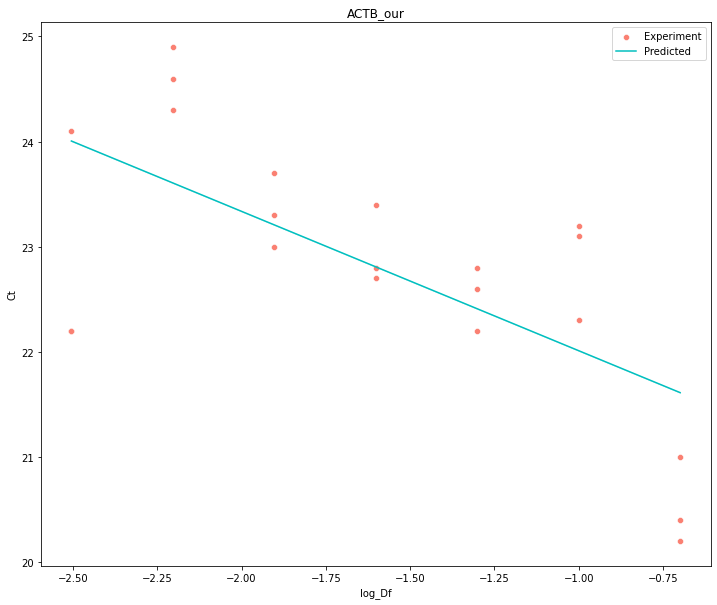

In [4]:
Df, Ct = np.array(ACTB["Dil.factor"].values.astype(float)), np.array(ACTB["Ct"].values.astype(float))
E, SE, a, p = efficiency(Ct, Df, "ACTB_our")
print(f'''Efficiency = {E}, Slope = {SE}
a = {a}, p = {p}''')

**2. With filtration (only Df = {5x, 20x, 40x, 80x, 160x})**

Efficiency = 2.500498, Slope = 0.356003
a = -2.512395, p = 0.39029


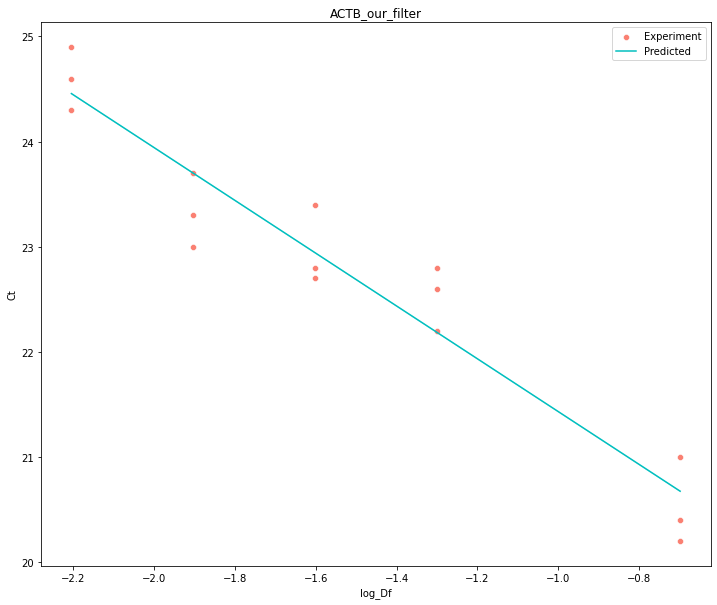

In [5]:
ACTB_filter = ACTB[(ACTB["Dil.factor"] < 320) & (ACTB["Dil.factor"] != 10)]
Df_filter = np.array(ACTB_filter["Dil.factor"].values.astype(float))
Ct_filter = np.array(ACTB_filter["Ct"].values.astype(float))
E_f, SE_f, a_f, p_f = efficiency(Ct_filter, Df_filter, "ACTB_our_filter")
print(f'''Efficiency = {E_f}, Slope = {SE_f}
a = {a_f}, p = {p_f}''')

### Colleague results

In [6]:
ACTB2 = pd.read_csv("ACTB_2.tsv", sep = '\t', index_col=0)
ACTB2["Gene"] = "ACTB"
ACTB2.fillna("")

,Row,Gene,Dil.factor,Ct
72,D,ACTB,5.0,19.7
73,,ACTB,5.0,19.7
74,,ACTB,5.0,19.6
75,,ACTB,10.0,23.5
76,,ACTB,10.0,23.5
77,,ACTB,10.0,23.6
78,,ACTB,20.0,22.7
79,,ACTB,20.0,22.6
80,,ACTB,20.0,22.6
81,,ACTB,40.0,23.6


**1. With all Df.**

Efficiency = 1.879144, Slope = 0.284702
a = -3.650166, p = 0.876679


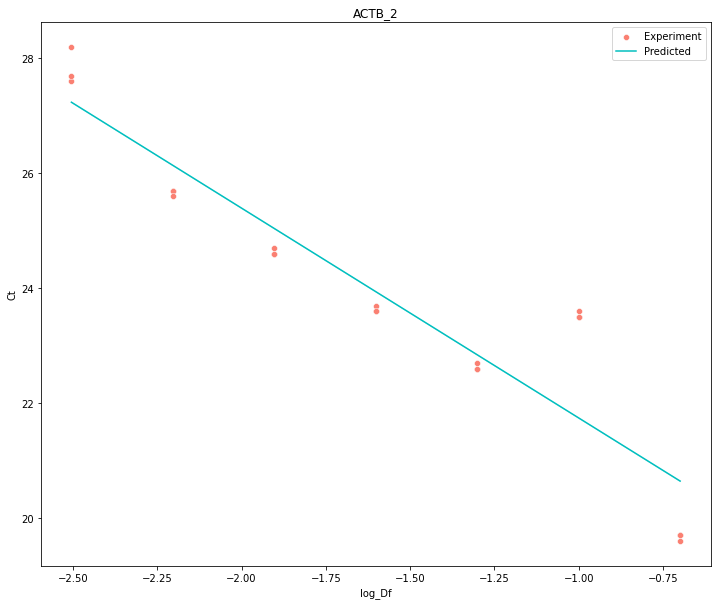

In [7]:
Df2, Ct2 = np.array(ACTB2["Dil.factor"].values.astype(float)), np.array(ACTB2["Ct"].values.astype(float))
E2, SE2, a2, p2 = efficiency(Ct2, Df2, "ACTB_2")
print(f'''Efficiency = {E2}, Slope = {SE2}
a = {a2}, p = {p2}''')

**2. With filtration (only Df = {20x, 40x, 80x, 160x})**

Efficiency = 1.986321, Slope = 0.020376
a = -3.355147, p = 0.050151


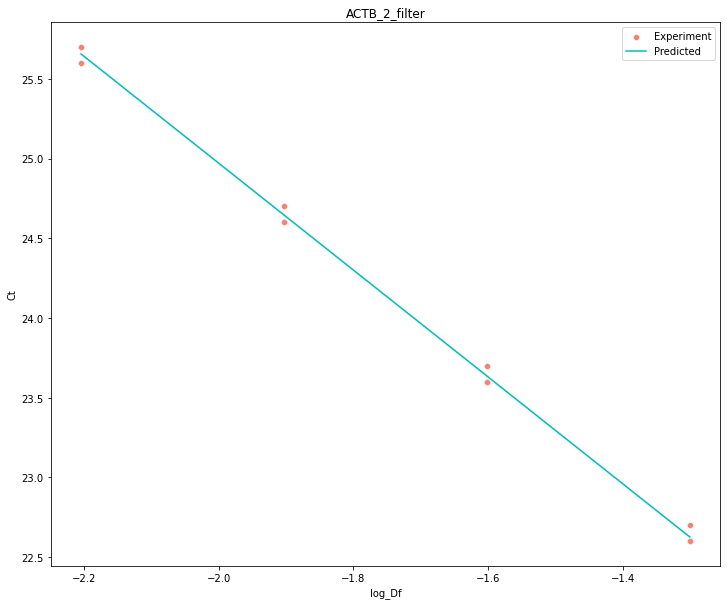

In [8]:
ACTB2_filter = ACTB2[(ACTB2["Dil.factor"] < 320) & (ACTB2["Dil.factor"] > 10)]
Df2_filter = np.array(ACTB2_filter["Dil.factor"].values.astype(float))
Ct2_filter = np.array(ACTB2_filter["Ct"].values.astype(float))
E2_f, SE2_f, a2_f, p2_f = efficiency(Ct2_filter, Df2_filter, "ACTB_2_filter")
print(f'''Efficiency = {E2_f}, Slope = {SE2_f}
a = {a2_f}, p = {p2_f}''')